<h1>1 - Seção 02 - API Básica e RNA - Câncer de Mama: Redes Neurais Básico<h1>

**Câncer de Mama**

* Base com dados de sangue para detecção de câncer de mama
* 593 amostras
* 30 atributos
* 2 classes: malígno/benígno
* Base carrega de sklearn

**Estratégia**

* Rede neural com: Entrada e 1 neurônio
* Classificação – 2 classes
* Função de ativação Sigmóide (0 – 1)
* Otimizador : adam
* Perda : binary_crossentropy
* Métrica : Acurácia







In [ ]:
from sklearn.datasets import load_breast_cancer # data imports
data = load_breast_cancer()
#type(data)
data.keys() # data structure

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print("1 data.data.shape: \n",data.data.shape);
print("2 data.target: \n",data.target);
print("3 data.target_names: \n ",data.target_names); # malignant, benign
print("4 data.feature_names: \n ",data.feature_names); # features to learning ex.:(mean radius, mean texture, mean perimeter ...)
print("5 data.target.shape: \n ",data.target.shape);

1 data.data.shape: 
 (569, 30)
2 data.target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1

In [ ]:
from sklearn.model_selection import train_test_split
# build partitions (train/test where X is 
# input and Y is target) from dataset
X_train, X_test, Y_train, Y_test = train_test_split(data.data,data.target,test_size=0.33) 
N, D = X_train.shape # train size
print("#####");
print("X_train size is: ",X_train.shape, "\n");
print("#####");
print("X_test size is: ",X_test.shape, "\n");
print("#####");
print("Y_train size is: ",Y_train.shape, "\n");
print("#####");
print("Y_test size is: ",Y_test.shape, "\n");


#####
X_train size is:  (381, 30) 

#####
X_test size is:  (188, 30) 

#####
Y_train size is:  (381,) 

#####
Y_test size is:  (188,) 



In [ ]:
from sklearn.preprocessing import StandardScaler 
# FUTURE ACTIVITIES ===> test without  standardScaler
scaler = StandardScaler() # active "standardtization" between [-1,1] by formula z = (x - u) / s, where u is mean, s is standard desviation
print("After standardScaler: \n", X_train);
print("#####");
X_train = scaler.fit_transform(X_train) # apply "standardtization" function on datas
print("Before standardScaler: \n", X_train);
print("#####");
X_test = scaler.transform(X_test) # apply "standardtization" function on datas


After standardScaler: 
 [[1.669e+01 2.020e+01 1.071e+02 ... 8.737e-02 4.677e-01 7.623e-02]
 [1.340e+01 1.695e+01 8.548e+01 ... 6.987e-02 2.741e-01 7.582e-02]
 [1.190e+01 1.465e+01 7.811e+01 ... 6.042e-02 2.727e-01 1.036e-01]
 ...
 [1.760e+01 2.333e+01 1.190e+02 ... 1.996e-01 2.301e-01 1.224e-01]
 [1.145e+01 2.097e+01 7.381e+01 ... 6.127e-02 2.762e-01 8.851e-02]
 [1.291e+01 1.633e+01 8.253e+01 ... 8.235e-02 3.024e-01 6.949e-02]]
#####
Before standardScaler: 
 [[ 0.74021825  0.20567614  0.63947758 ... -0.40642559  2.93474015
  -0.44912841]
 [-0.18800179 -0.59346559 -0.24862259 ... -0.67749274 -0.25013884
  -0.4721227 ]
 [-0.61120241 -1.15901204 -0.55136534 ... -0.823869   -0.27316999
   1.08588089]
 ...
 [ 0.99695996  0.97531109  1.12830237 ...  1.33196679 -0.97397497
   2.14025336]
 [-0.7381626   0.39501125 -0.72799951 ... -0.81070288 -0.21559211
   0.23957872]
 [-0.32624732 -0.74591724 -0.36980185 ... -0.48418314  0.2154194
  -0.82713216]]
#####


In [ ]:
import tensorflow as tf
from tensorflow import keras
model = tf.keras.models.Sequential( [
tf.keras.layers.Input(shape=(D,)), # instantiate a Keras tensor, indicates that the input layer expects a one-dimensional tensor of size "D"
tf.keras.layers.Dense(1, activation='sigmoid') # ocult layers with 1 neuron
] )

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



A linha de código "model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])" é usada para compilar um modelo de rede neural no Keras.

O método "compile" é usado para configurar o processo de treinamento da rede neural, especificando o otimizador, a função de perda e as métricas de avaliação que serão usadas durante o treinamento.

O argumento "optimizer='adam'" especifica o algoritmo de otimização a ser usado durante o treinamento. Neste caso, estamos usando o otimizador "Adam", que é um algoritmo de otimização estocástico popular para redes neurais.

O argumento "loss='binary_crossentropy'" especifica a função de perda a ser usada durante o treinamento. Neste caso, estamos usando a função de perda "binary_crossentropy", que é comumente usada para problemas de classificação binária.

O argumento "metrics=['accuracy']" especifica a métrica de avaliação a ser usada durante o treinamento. Neste caso, estamos usando a métrica de acurácia, que é uma métrica comum para avaliar o desempenho de modelos de classificação.

Após a compilação do modelo, ele está pronto para ser treinado com o método "fit", passando os dados de treinamento e validação apropriados.

O algoritmo de otimização "Adam" é um dos algoritmos mais populares para otimização de redes neurais. O nome "Adam" é uma abreviação de "Adaptive Moment Estimation".

O algoritmo Adam é um método de otimização estocástica que combina as vantagens do algoritmo de otimização estocástica em mini-batches (SGD) e do algoritmo Adagrad. O Adam mantém uma média móvel exponencial das estimativas do primeiro e segundo momentos dos gradientes (momentos de ordem um e dois, respectivamente), e usa essas estimativas para ajustar a taxa de aprendizado dos pesos da rede.

O algoritmo Adam atualiza os pesos da rede de acordo com a seguinte equação:

w = w - alpha * m_hat / (sqrt(v_hat) + epsilon)

onde w é o vetor de pesos da rede, alpha é a taxa de aprendizado, m_hat é a média móvel exponencial do gradiente, v_hat é a média móvel exponencial do gradiente ao quadrado, e epsilon é um pequeno valor para evitar a divisão por zero.

O algoritmo Adam é eficaz porque é capaz de se adaptar a diferentes taxas de aprendizado para diferentes parâmetros da rede neural, tornando-o mais robusto a problemas com alta variância ou esparso. Além disso, o algoritmo Adam é capaz de se ajustar a gradientes com magnitudes muito diferentes, o que pode levar a uma convergência mais rápida da rede.

In [ ]:
r = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),
epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 73ms/step - loss: 1.3342 - accuracy: 0.1627 - val_loss: 1.4567 - val_accuracy: 0.1702
Epoch 2/100
12/12 [==============================] - 0s 22ms/step - loss: 1.2122 - accuracy: 0.1916 - val_loss: 1.3243 - val_accuracy: 0.1915
Epoch 3/100
12/12 [==============================] - 0s 17ms/step - loss: 1.1038 - accuracy: 0.2310 - val_loss: 1.1969 - val_accuracy: 0.2021
Epoch 4/100
12/12 [==============================] - 0s 17ms/step - loss: 1.0020 - accuracy: 0.2887 - val_loss: 1.0818 - val_accuracy: 0.2287
Epoch 5/100
12/12 [==============================] - 1s 50ms/step - loss: 0.9086 - accuracy: 0.3412 - val_loss: 0.9795 - val_accuracy: 0.2766
Epoch 6/100
12/12 [==============================] - 0s 23ms/step - loss: 0.8279 - accuracy: 0.4068 - val_loss: 0.8870 - val_accuracy: 0.3670
Epoch 7/100
12/12 [==============================] - 0s 14ms/step - loss: 0.7561 - accuracy: 0.5118 - val_loss: 0.8051 - val_accuracy: 0.4574
Epoch 

In [ ]:
print("Train score: ", model.evaluate(X_train, Y_train))
print("Test score: ", model.evaluate(X_test, Y_test))

12/12 [==============================] - 0s 5ms/step - loss: 0.1169 - accuracy: 0.9711
Train score:  [0.1168806254863739, 0.9711285829544067]
6/6 [==============================] - 0s 7ms/step - loss: 0.1169 - accuracy: 0.9521
Test score:  [0.11686471104621887, 0.9521276354789734]


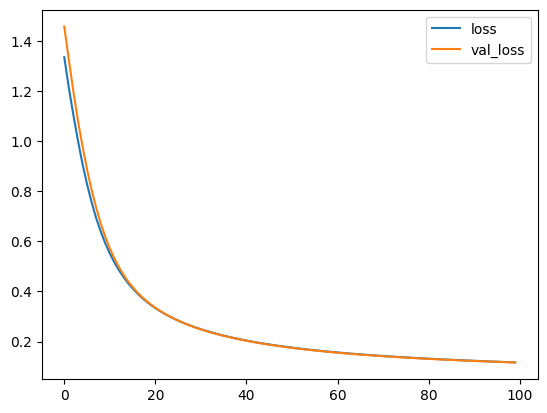

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend()

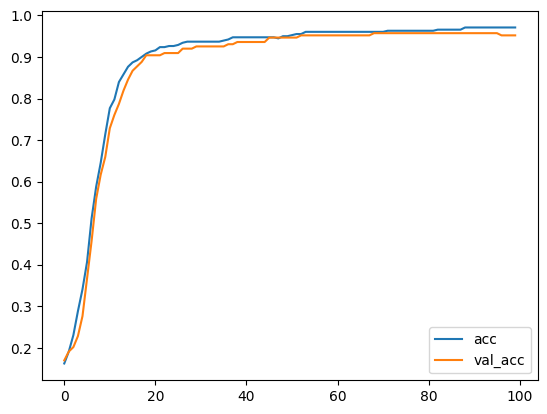

In [ ]:
plt.plot(r.history['accuracy'], label="acc")
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Ao fazer previsões com um modelo de rede neural, podemos avaliar a sua capacidade de generalização e determinar a sua precisão em dados nunca antes vistos.

In [ ]:
pred = model.predict(X_test)
print(pred)

6/6 [==============================] - 0s 3ms/step
[[9.28799629e-01]
 [1.99969281e-02]
 [6.99075758e-02]
 [9.09955919e-01]
 [2.37521790e-02]
 [2.93817639e-01]
 [9.87947166e-01]
 [8.03050458e-01]
 [9.77191985e-01]
 [9.27137375e-01]
 [8.92743587e-01]
 [2.21348569e-06]
 [7.54374623e-01]
 [4.01147574e-01]
 [9.38564073e-03]
 [9.89620626e-01]
 [9.67781723e-01]
 [3.07488292e-02]
 [1.16202995e-04]
 [9.87027466e-01]
 [9.58206832e-01]
 [9.95147288e-01]
 [9.97169495e-01]
 [9.91988301e-01]
 [9.09663320e-01]
 [3.61147895e-03]
 [6.37606812e-09]
 [4.39271843e-03]
 [9.46810395e-02]
 [9.90996122e-01]
 [5.82986891e-01]
 [1.25351146e-01]
 [9.82866883e-01]
 [9.92623508e-01]
 [9.78113711e-01]
 [7.87115812e-01]
 [9.88530397e-01]
 [5.44154667e-04]
 [2.42936367e-05]
 [9.30823982e-01]
 [5.79275012e-01]
 [9.58707392e-01]
 [9.67275798e-01]
 [9.39231932e-01]
 [9.93205607e-01]
 [7.55315781e-01]
 [1.33555965e-04]
 [7.82680511e-03]
 [4.96181473e-02]
 [2.49834935e-04]
 [9.95076418e-01]
 [1.15216207e-02]
 [9.46163058e

In [ ]:
import numpy as np
# flatten: transformar em vetor, pois está em matriz (N,1)
pred = np.round(pred).flatten()
print(pred)

[1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1.]


In [ ]:
print("Acurácia na mão: ", np.mean(pred == Y_test))
print("Evaluate: ", model.evaluate(X_test, Y_test)) # fit model's evaluate with test dataset. Return(loss,acurracy)
print("")
print("Perda (Loss): ", model.evaluate(X_test, Y_test)[0]) # measure of the difference between model predictions and actual labels
print("Acurácia (Accuracy): ", model.evaluate(X_test, Y_test)[1])


Acurácia na mão:  0.9521276595744681
6/6 [==============================] - 0s 4ms/step - loss: 0.1169 - accuracy: 0.9521
Evaluate:  [0.11686471104621887, 0.9521276354789734]

6/6 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9521
Perda (Loss):  0.11686471104621887
6/6 [==============================] - 0s 3ms/step - loss: 0.1169 - accuracy: 0.9521
Acurácia (Accuracy):  0.9521276354789734


In [ ]:
print(X_test)
print("#####")
print(Y_test)

[[-0.43063681 -0.74837614 -0.42238132 ... -0.45692153  0.43092516
  -0.4967995 ]
 [ 0.23519884  0.77859928  0.43408901 ...  2.07391631 -0.04450357
   1.75327623]
 [ 1.39194722 -0.11152166  1.30904431 ...  0.12687967 -0.08563063
  -1.05595342]
 ...
 [-0.38549541 -1.76881864 -0.43758008 ... -0.48588699 -0.19420605
   0.58337145]
 [ 1.11827748 -0.61805456  1.0666858  ...  0.61789846 -0.08398554
  -0.11150488]
 [-0.9864403  -0.25659661 -1.01513273 ... -1.41556987 -0.31923229
  -0.94659032]]
#####
[1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1
 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1
 1 0 1]


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

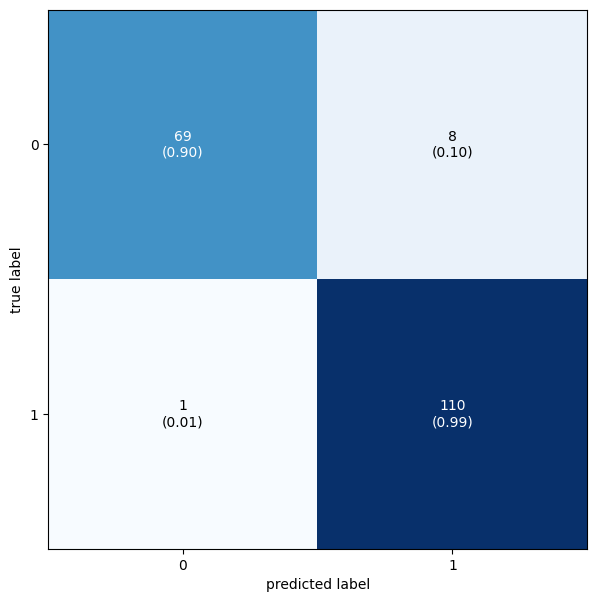

In [ ]:
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred) # real x predict
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

<h1>2 - Seção 02 - API Básica e RNA - MNIST: Reconhecimento de dígitos </h1>

**Estratégia**

* Classificação – 10 classes
* Rede neural
* Entrada (28 x 28)
* Achatar entrada (784)
* Densa (128) – Função de ativação relu
* Dropout (20%)
* Saída : Densa (10) – Função de ativação softmax
* Otimizador : adam
* Perda : sparse_categorical_crossentropy
* Métrica : Acurácia

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data();
print("x_train.shape: ", x_train.shape);
print("y_train.shape: ", y_train.shape);
print("x_test.shape: ", y_test.shape);
print("y_test.shape: ", y_test.shape);

x_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
x_test.shape:  (10000,)
y_test.shape:  (10000,)


Each image is 28 pixels high by 28 pixels wide, totaling 784 pixels. Each pixel has an intensity value from 0 to 255, which indicates how dark the pixel is.

To train a neural network on this data, it is common to normalize the pixel intensities so that they are in the range 0 to 1 instead of 0 to 255. This is done to make training the neural network easier and improve its accuracy.

In [ ]:
x_train, x_test = x_train/255.0, x_test/255.0 #normalize datasets
print("x_train size is: ",x_train.shape);
print("x_test size is: ",x_test.shape);



x_train size is:  (60000, 28, 28)
x_test size is:  (10000, 28, 28)


In [ ]:
i = tf.keras.layers.Input(shape=(28, 28))# input normalize matrix (28x28)
#defines an input layer that takes 28x28 pixel images and flattens the image 
#into a sequence of 784 values. This input layer will be used to train a neural network 
#to recognize handwritten digits.
x = 0;
x = tf.keras.layers.Flatten()(i) # turns i into a vector (784x1)
print('tf.keras.layers.Flatten()(i) is:',x);
x = tf.keras.layers.Dense(128, activation="relu")(x) # ocult layer
print("tf.keras.layers.Dense(128, activation=\"relu\")(x) is:",x);


tf.keras.layers.Flatten()(i) is: KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name=None), name='flatten_3/Reshape:0', description="created by layer 'flatten_3'")
tf.keras.layers.Dense(128, activation="relu")(x) is: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dense_11/Relu:0', description="created by layer 'dense_11'")


A camada Dropout é uma técnica de regularização usada em redes neurais para evitar o overfitting, que é um problema comum em modelos de aprendizado de máquina quando o modelo se ajusta muito bem aos dados de treinamento, mas tem um desempenho pobre em novos dados.

A camada Dropout funciona desativando aleatoriamente um determinado número de unidades de entrada durante o treinamento da rede neural, definido pela taxa de dropout. A taxa de dropout de 0,2 significa que 20% das unidades de entrada serão desativadas durante o treinamento.

Ao desativar aleatoriamente algumas das unidades de entrada durante o treinamento, a camada Dropout força a rede a aprender características redundantes em diferentes combinações de unidades, o que pode ajudar a reduzir o overfitting.

In [ ]:

x = tf.keras.layers.Dropout(0.2)(x)
print("tf.keras.layers.Dropout(0.2)(x) is:",x);
x = tf.keras.layers.Dense(10, activation="softmax")(x) #A função "softmax" é usada para garantir que a soma das probabilidades de todas as classes seja igual a 1.0.
print("tf.keras.layers.Dense(10, activation=\"softmax\")(x) is:",x);
model = tf.keras.models.Model(i, x)
model.summary() # note that there are the bias, this is, 784*128 = 100352 + bias (128) = 100480


tf.keras.layers.Dropout(0.2)(x) is: KerasTensor(type_spec=TensorSpec(shape=(None, 128), dtype=tf.float32, name=None), name='dropout_7/Identity:0', description="created by layer 'dropout_7'")
tf.keras.layers.Dense(10, activation="softmax")(x) is: KerasTensor(type_spec=TensorSpec(shape=(None, 10), dtype=tf.float32, name=None), name='dense_12/Softmax:0', description="created by layer 'dense_12'")
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               100480    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0  

In [ ]:
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
r = model.fit(x_train,
y_train,
validation_data=(x_test, y_test),
epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2957 - accuracy: 0.9141 - val_loss: 0.1399 - val_accuracy: 0.9587
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1413 - accuracy: 0.9583 - val_loss: 0.0989 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1066 - accuracy: 0.9681 - val_loss: 0.0811 - val_accuracy: 0.9748
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0875 - accuracy: 0.9722 - val_loss: 0.0865 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9768 - val_loss: 0.0705 - val_accuracy: 0.9803
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0657 - accuracy: 0.9788 - val_loss: 0.0714 - val_accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0592 - accuracy: 0.9814 - val_loss: 0.0717 - val_accuracy:

313/313 [==============================] - 1s 4ms/step - loss: 0.0673 - accuracy: 0.9800
[0.06732337921857834, 0.9800000190734863]


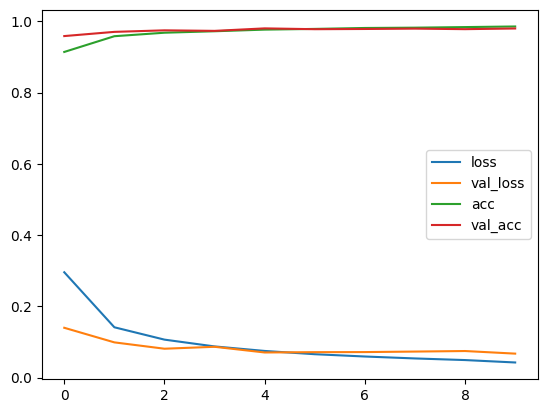

In [ ]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar a acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()
# Avaliar o modelo com a base de teste
print( model.evaluate(x_test, y_test) )

313/313 [==============================] - 2s 6ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

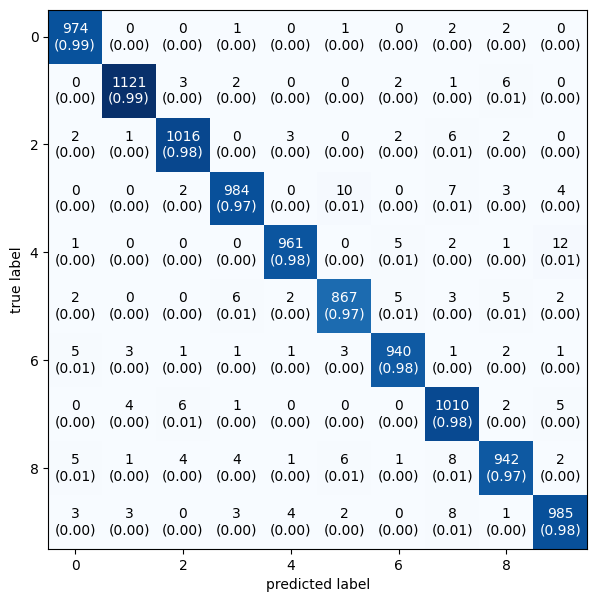

In [ ]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7),
show_normed=True)

Text(0.5, 1.0, 'True label: 3 Predicted: 9')

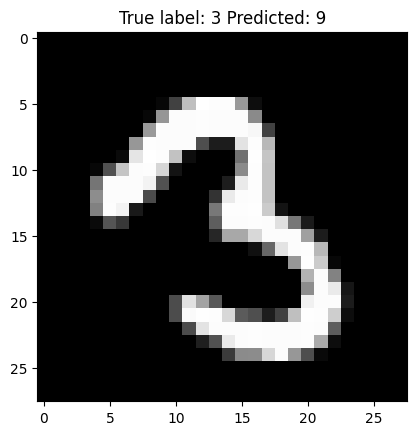

In [ ]:
# mostrar algumas classificações erradas
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

Text(0.5, 1.0, 'True label: 6 Predicted: 6')

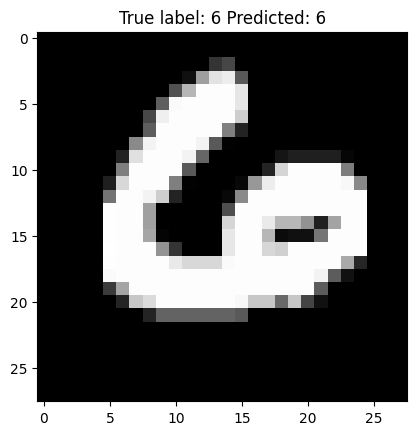

In [ ]:
# mostrar algumas classificações corretas
classified = np.where(y_pred == y_test)[0]
i = np.random.choice(classified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], y_pred[i]))

313/313 [==============================] - 1s 2ms/step


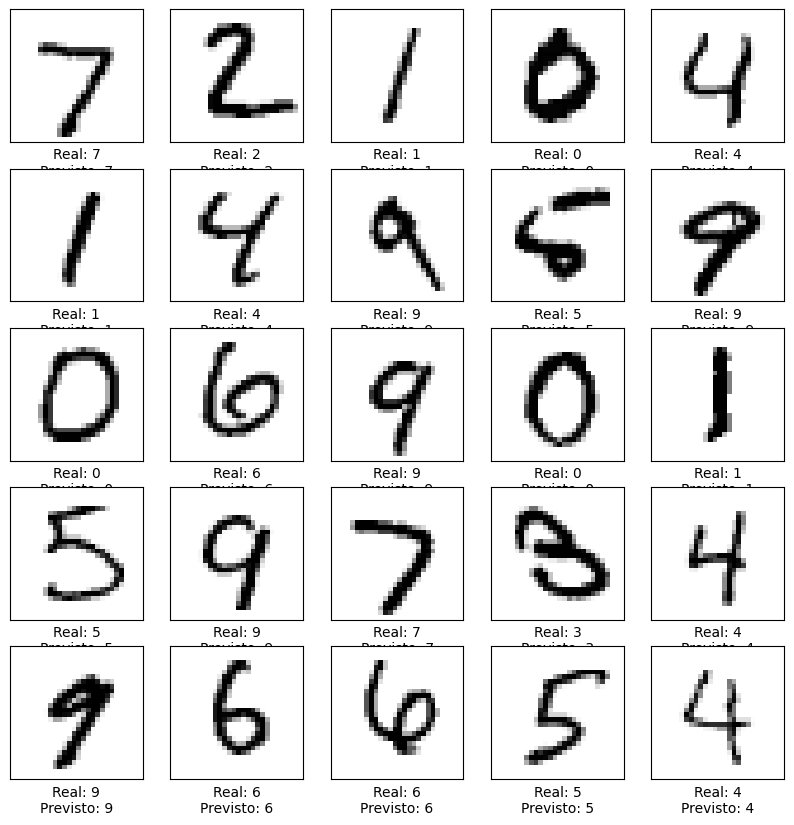

In [ ]:
import matplotlib.pyplot as plt

# Obtenha as previsões do modelo na época final
preds = model.predict(x_test)

# Plote as primeiras 25 imagens de teste com suas previsões correspondentes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("Real: " + str(y_test[i]) + "\nPrevisto: " + str(np.argmax(preds[i])))
plt.show()

#Este código plota as primeiras 25 imagens de teste com suas previsões correspondentes na época final. Para plotar as imagens em cada época, basta colocar esse código dentro de um loop for que percorre as épocas e chamar a função plt.show() dentro do loop para exibir a imagem a cada época.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# definindo as épocas
epochs = 3

# loop pelas épocas
for epoch in range(epochs):
    # treinando o modelo
    r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=1)
    
    # fazendo a predição para as imagens de teste
    y_pred = model.predict(x_test)
    
    # escolhendo aleatoriamente algumas imagens para plotar
    np.random.seed(100);
    indices = np.random.choice(range(len(x_test)), size=16, replace=False)
    x_selected = x_test[indices]
    y_selected = y_test[indices]
    y_pred_selected = np.argmax(y_pred[indices], axis=1)
    
    # criando a figura
    fig, ax = plt.subplots(4, 4, figsize=(10,10))
    fig.suptitle(f"Epoch {epoch+1}")
    fig.tight_layout(pad=3.0)
    
    # plotando as imagens
    for i in range(4):
        for j in range(4):
            k = i * 4 + j
            ax[i, j].imshow(x_selected[k], cmap='gray')
            ax[i, j].set_title(f"True: {y_selected[k]}\nPred: {y_pred_selected[k]}")
            ax[i, j].axis('off')
    
    # salvando a imagem
    plt.savefig(f"epoch_{epoch+1}.png")
    plt.close()


313/313 [==============================] - 1s 2ms/step
Epoch 1/2
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0171 - accuracy: 0.9938 - val_loss: 0.1123 - val_accuracy: 0.9813
Epoch 2/2
313/313 [==============================] - 0s 1ms/step


<h1>3 - Seção 02 - API Básica e RNA - Biomassa: Predição de Biomassa
</h1>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
tf.__version__


In [ ]:
!wget http://www.razer.net.br/datasets/Biomassa_REG.csv
data = pd.read_csv("Biomassa_REG.csv", sep=";", decimal=
",").values
X = data[:,0:3].astype(float) # DAP,H,ME
Y = data[:,3].astype(float) # BIOMASSA

--2023-04-05 19:52:06--  http://www.razer.net.br/datasets/Biomassa_REG.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82988 (81K) [text/csv]
Saving to: ‘Biomassa_REG.csv’

Biomassa_REG.csv    100%[===================>]  81.04K  --.-KB/s    in 0.06s   

2023-04-05 19:52:06 (1.44 MB/s) - ‘Biomassa_REG.csv’ saved [82988/82988]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.33) # split train/test

dap_train = x_train[:,0]
h_train = x_train[:,1]

dap_test = x_test[:,0]
h_test = x_test[:,1]

In [ ]:
i = tf.keras.layers.Input(shape=(3,))

x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(i, x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_5 (Dense)             (None, 50)                200       
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def rmse(y_true, y_pred):
  return backend.sqrt(backend.mean( backend.square(y_pred - y_true), axis=-1) ) # work with tensors (calculo a diferença do quadrado e depois a média numa dimensação específica do tensor, que é uma matriz)
def r2(y_true, y_pred):
  media = backend.mean(y_true)
  num = backend.sum (backend.square(y_true - y_pred))
  den = backend.sum (backend.square(y_true - media))
  return (1.0 - num/den)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05) # otimizer model
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,loss="mse",metrics=[rmse, r2]) # compile() é usada para configurar o processo de treinamento do modelo antes de ajustá-lo aos dados.
#optimizer: um otimizador de gradiente descendente, que é responsável por ajustar os pesos do modelo com base no erro de treinamento;
#loss: a função de perda, que é usada para calcular o erro de treinamento do modelo;
#metrics: uma lista de métricas que serão usadas para avaliar o desempenho do modelo durante o treinamento.


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=20, restore_best_weights=True)# avoid model overfitting


O EarlyStopping é um callback que monitora uma métrica específica do modelo durante o treinamento e interrompe o treinamento quando a métrica não melhora mais, evitando que o modelo continue a treinar sem melhorias significativas.

Os argumentos passados ao criar o objeto EarlyStopping são:

* monitor: a métrica a ser monitorada durante o treinamento. Nesse caso, a métrica escolhida é "val_loss", que se refere à perda de validação do modelo. Isso significa que o treinamento será interrompido quando a perda de validação não melhorar mais;
* patience: o número de épocas em que o treinamento pode não melhorar antes que o treinamento seja interrompido. Nesse caso, o valor escolhido é 20, o que significa que o treinamento será interrompido se a perda de validação não melhorar em 20 épocas consecutivas;
* restore_best_weights: um parâmetro booleano que indica se os pesos do modelo devem ser restaurados para aqueles que apresentaram o melhor desempenho durante o treinamento. Se esse parâmetro for definido como True, o modelo será restaurado para os pesos que apresentaram a menor perda de validação durante o treinamento.

Em geral, um callback é uma função que é chamada em um ponto específico durante o processo de treinamento do modelo. Isso pode ser usado para fazer coisas como salvar o modelo após cada época, ajustar a taxa de aprendizado do otimizador, ou interromper o treinamento quando uma determinada métrica atinge um valor específico.

Os callbacks são comuns em bibliotecas de aprendizado de máquina, como Keras, PyTorch, e TensorFlow. Eles são particularmente úteis para ajustar os hiperparâmetros do modelo e personalizar o comportamento do modelo para atender às necessidades específicas do problema.

In [ ]:
r = model.fit(x_train, y_train, epochs=1500, validation_data=(x_test, y_test),callbacks=[early_stop]) # train model


Essa linha de código treina um modelo de aprendizado de máquina usando o método fit da biblioteca Keras, que é parte do TensorFlow, em Python.

Os argumentos passados para o método fit são:

* x_train: a entrada de treinamento do modelo, ou seja, os dados que serão usados para treinar o modelo;
* y_train: a saída de treinamento do modelo, ou seja, os rótulos correspondentes aos dados de entrada que serão usados para treinar o modelo;
* epochs: o número de épocas que o modelo será treinado. Nesse caso, o valor é 1500, o que significa que o modelo será treinado por 1500 épocas;
* validation_data: os dados de validação que serão usados para avaliar o desempenho do modelo durante o treinamento. Esses dados são usados para monitorar a perda e outras métricas do modelo durante o treinamento, mas não são usados para treinar o modelo. Em geral, a validação é usada para verificar se o modelo está generalizando bem para novos dados e evitar o overfitting. Nesse caso, x_test e y_test são usados como dados de validação;
* callbacks: uma lista de callbacks a serem usados durante o treinamento do modelo. Nesse caso, o único callback especificado é o early_stop, que é um objeto do tipo EarlyStopping, que interromperá o treinamento se a perda de validação não melhorar por um número específico de épocas.

Em resumo, essa linha de código treina um modelo de aprendizado de máquina usando dados de entrada e saída de treinamento, validação e callbacks especificados. O treinamento será interrompido precocemente se a perda de validação não melhorar em 20 épocas, o que é determinado pelo objeto early_stop passado na lista de callbacks.

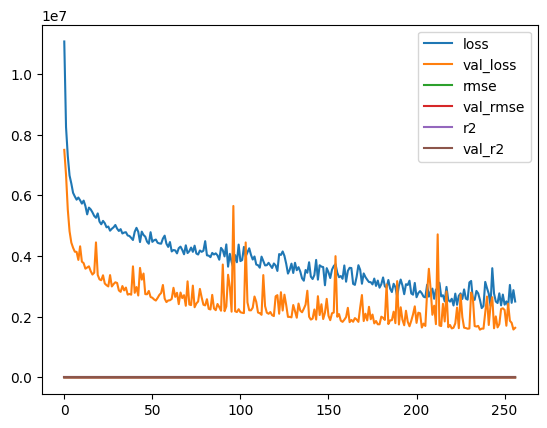

In [ ]:
plt.plot( r.history["loss"], label="loss(train error)" )
plt.plot( r.history["val_loss"], label="val_loss(val.error)" )
plt.legend()
plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

In [ ]:
y_pred = model.predict(x_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("mse = ", mse)
print("rmse = ", rmse)
print("r2 = ", r2)

42/42 [==============================] - 0s 2ms/step
mse =  1574567.9610138058
rmse =  1254.8178995431192
r2 =  0.8965276038161002


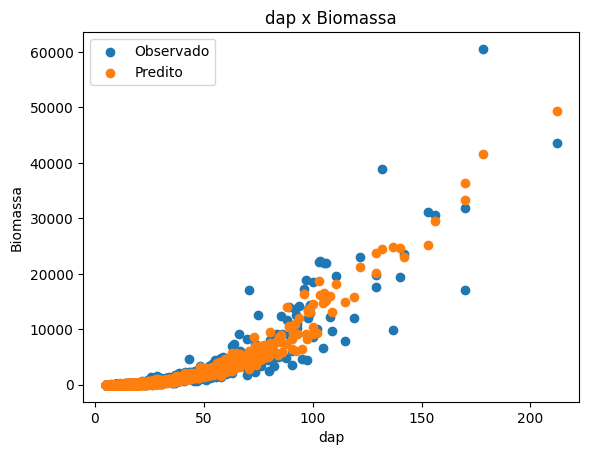

In [ ]:
plt.scatter(dap_test, y_test, label="Observado")
plt.scatter(dap_test, y_pred, label="Predito")
plt.title("dap x Biomassa")
plt.xlabel("dap")
plt.ylabel("Biomassa")
plt.legend()
plt.show()

<h1>4 - Seção 03 - CNN - Fashion MNIST: Classificação de imagens
</h1>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten,\
Dropout
from tensorflow.keras.models import Model

In [ ]:
# Carga dos dados
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0 # RGB color interval has values ranging from 0 to 255, This normalization keeps the values between 0 and 1. 
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)
# Adicionar uma dimensão:
# N x H x W -> N x H x W x C => shape = (instances numbers, height,width,depth)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)
print("x_test.shape: ", x_test.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)
x_test.shape:  (10000, 28, 28)
x_train.shape:  (60000, 28, 28, 1)
x_test.shape:  (10000, 28, 28, 1)


Aqui estão algumas considerações que podem ajudá-lo a determinar o tamanho do kernel:

* Tamanho da imagem de entrada: O tamanho do kernel deve ser menor do que o tamanho da imagem de entrada. Caso contrário, o kernel não será capaz de percorrer todas as áreas da imagem.

* Complexidade do problema: Problemas complexos podem exigir kernels maiores para capturar padrões mais complexos e sutis.

* Nível de detalhe necessário: Se o objetivo for capturar características mais detalhadas, um kernel menor pode ser usado.

Não existe uma fórmula específica para determinar o tamanho ideal do kernel em uma CNN, mas experimentar diferentes tamanhos e avaliar o desempenho da rede pode ajudar a encontrar a melhor configuração para o seu problema.

In [ ]:
# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation="relu",padding='valid',use_bias=True,bias_initializer='zeros')(i)
x = Conv2D(64, (3, 3), strides=2, activation="relu",padding='valid',use_bias=True,bias_initializer='zeros')(x)
x = Conv2D(128, (3, 3), strides=2, activation="relu",padding='valid',use_bias=True,bias_initializer='zeros')(x)
x = Flatten()(x)
x = Dropout(0.2)(x) #A camada de dropout aleatoriamente "desliga" alguns neurônios durante o treinamento, o que força a rede a aprender recursos mais robustos e distribuídos em vez de depender excessivamente de alguns neurônios específicos.
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)


In [ ]:
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),
epochs=15)

Epoch 1/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0812 - accuracy: 0.9711 - val_loss: 0.5113 - val_accuracy: 0.9022
Epoch 2/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0744 - accuracy: 0.9720 - val_loss: 0.5067 - val_accuracy: 0.9038
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0756 - accuracy: 0.9725 - val_loss: 0.5181 - val_accuracy: 0.8999
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9729 - val_loss: 0.5457 - val_accuracy: 0.9036
Epoch 5/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0695 - accuracy: 0.9752 - val_loss: 0.5696 - val_accuracy: 0.8979
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0736 - accuracy: 0.9739 - val_loss: 0.5174 - val_accuracy: 0.8997
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0698 - accuracy: 0.9755 - val_loss: 0.5753 - val_accura

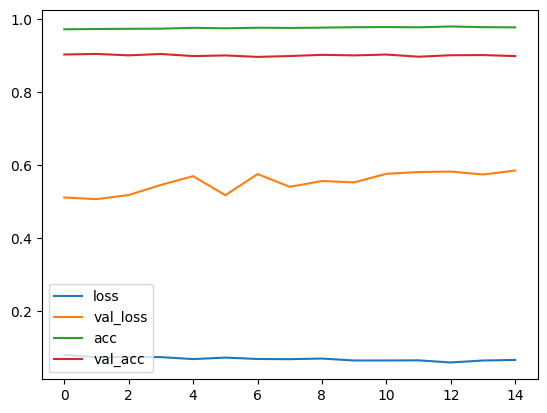

In [ ]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 1s 2ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

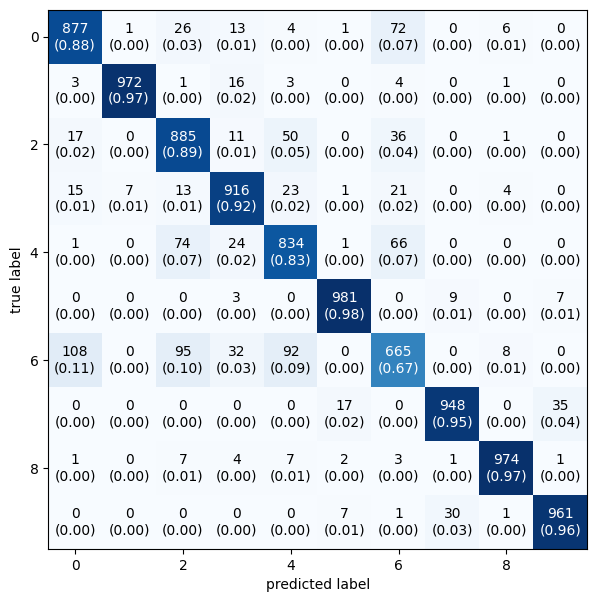

In [ ]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: Shirt Predicted: Pullover')

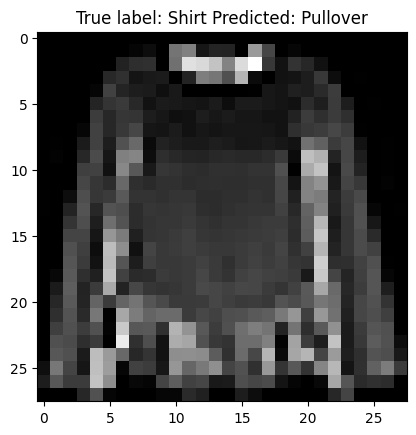

In [ ]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal','Shirt', 'Sneaker', 'Bag', 'Ankle boot']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]],
labels[y_pred[i]]))

<h1>5 - Seção 03 - CNN - CIFAR10 : Classificação de imagens</h1>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense,\
Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizar os dados
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape: ", x_train.shape)
print("y_train.shape: ", y_train.shape)
print("x_test.shape: ", x_test.shape)
print("y_test.shape: ", y_test.shape)

170498071/170498071 [==============================] - 6s 0us/step
x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)
x_test.shape:  (10000, 32, 32, 3)
y_test.shape:  (10000,)


In [ ]:
# número de classes
K = len(set(y_train))
# Camadas
i = Input(shape=x_train[0].shape)
x = Conv2D(64, (3, 3), strides=2, activation="relu")(i)
x = Conv2D(128, (5, 5), strides=1, activation="relu")(x)
x = Conv2D(256, (3, 3), strides=1, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.3)(x)
x = Dense(K, activation="softmax")(x)
# Model ( lista entrada, lista saída)
model = Model(i, x)

In [ ]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 19s 10ms/step - loss: 1.5454 - accuracy: 0.4360 - val_loss: 1.2693 - val_accuracy: 0.5408
Epoch 2/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2398 - accuracy: 0.5582 - val_loss: 1.1381 - val_accuracy: 0.6000
Epoch 3/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0814 - accuracy: 0.6181 - val_loss: 1.0156 - val_accuracy: 0.6364
Epoch 4/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9561 - accuracy: 0.6637 - val_loss: 0.9461 - val_accuracy: 0.6692
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8367 - accuracy: 0.7041 - val_loss: 0.9271 - val_accuracy: 0.6782
Epoch 6/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7463 - accuracy: 0.7354 - val_loss: 0.9433 - val_accuracy: 0.6801
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6454 - accuracy: 0.7715 - val_loss: 0.9742 -

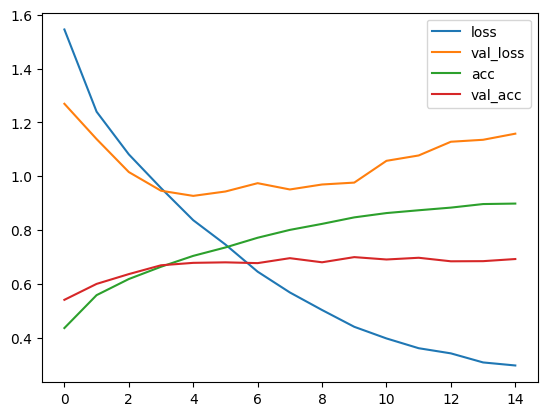

In [ ]:
# Plotar a função de perda
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
# Plotar acurácia
plt.plot(r.history["accuracy"], label="acc")
plt.plot(r.history["val_accuracy"], label="val_acc")
plt.legend()

313/313 [==============================] - 1s 3ms/step


(<Figure size 700x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

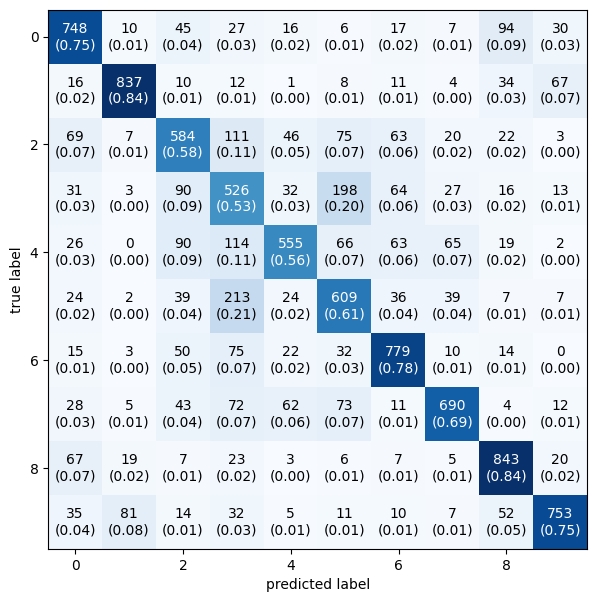

In [ ]:
# Efetuar predições
y_pred = model.predict(x_test).argmax(axis=1)
# Mostrar a matriz de confusão
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat=cm, figsize=(7, 7), show_normed=True)

Text(0.5, 1.0, 'True label: automobile Predicted: cat')

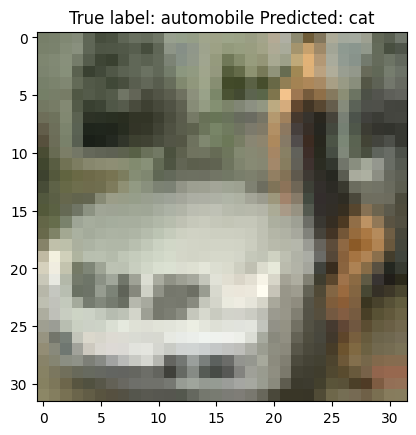

In [ ]:
# Mostrar algumas classificaç!oes erradas
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse', 'ship', 'truck']
misclassified = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(x_test[i], cmap="gray")
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[y_pred[i]]))

<h1>6 - Seção 04 - RNN e Classificação de Textos - Senoidal : Predição de Série Temporal</h1>

In [ ]:
import tensorflow as tf
tf.__version__
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

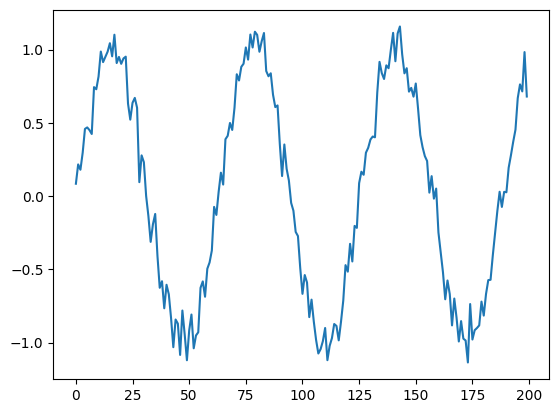

In [ ]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1
plt.plot(series)
plt.show()

In [ ]:
T = 10
D = 1
X = []
Y = []
# tamanho da janela
# quantidade de dados
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (190, 10, 1)  Y.shape:  (190,)


In [ ]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation="relu")(i)
x = Dense(1)(x)
model = Model(i, x)

In [ ]:
model.compile(
loss="mse",
optimizer=Adam(lr=0.1)
)

In [ ]:
r = model.fit(
X[:-N//2], Y[:-N//2],
epochs=80,
validation_data=(X[-N//2:], Y[-N//2:])
)

Epoch 1/80
3/3 [==============================] - 2s 114ms/step - loss: 0.3970 - val_loss: 0.2508
Epoch 2/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3870 - val_loss: 0.2450
Epoch 3/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3777 - val_loss: 0.2396
Epoch 4/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3690 - val_loss: 0.2344
Epoch 5/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3599 - val_loss: 0.2293
Epoch 6/80
3/3 [==============================] - 0s 22ms/step - loss: 0.3520 - val_loss: 0.2246
Epoch 7/80
3/3 [==============================] - 0s 36ms/step - loss: 0.3444 - val_loss: 0.2199
Epoch 8/80
3/3 [==============================] - 0s 27ms/step - loss: 0.3371 - val_loss: 0.2159
Epoch 9/80
3/3 [==============================] - 0s 24ms/step - loss: 0.3310 - val_loss: 0.2132
Epoch 10/80
3/3 [==============================] - 0s 25ms/step - loss: 0.3270 - val_loss: 0.2112
Epoch 11/80
3/3 [===========

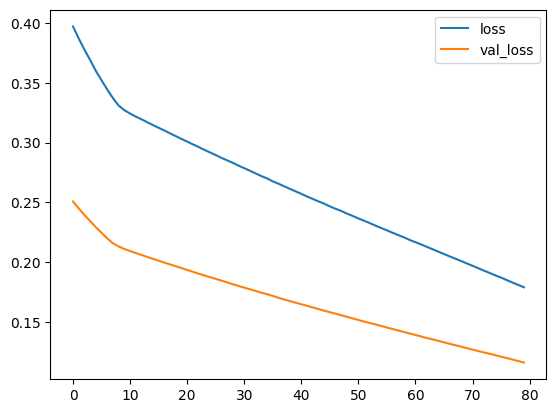

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []
i = -N//2
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)

1/1 [==============================] - 0s 18ms/step


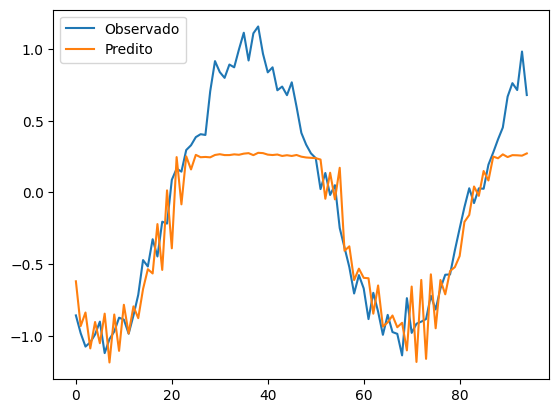

In [ ]:
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

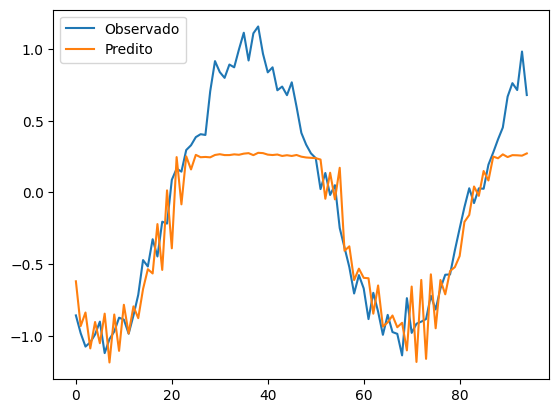

In [ ]:
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

<h1>7 - Seção 04 - RNN e Classificação de Textos - Passageiros : Predição de Série Temporal
</h1>

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
tf.__version__

'2.12.0'

--2023-04-19 11:45:38--  http://www.razer.net.br/datasets/airline-passengers.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/csv]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2023-04-19 11:45:38 (249 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



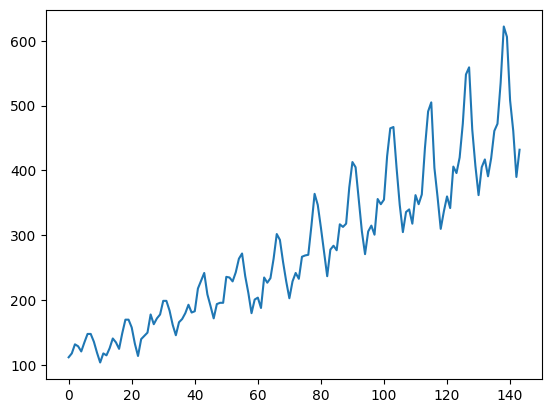

In [ ]:
!wget http://www.razer.net.br/datasets/airline-passengers.csv
df = pd.read_csv("airline-passengers.csv", usecols=[1])
df.head()
plt.plot(df)
plt.show()

In [ ]:
series = df.values
series = series.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
series = scaler.fit_transform(series)
# tamanho da base de treino – 67% do total
train_size = int(len(series) * 0.67)

In [ ]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
X = np.array(X).reshape(-1, T, 1) # Fica N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, "Y.shape: ", Y.shape)

X.shape:  (134, 10, 1) Y.shape:  (134, 1)


In [ ]:
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
# x = SimpleRNN(5, activation="relu")(i)
# x = SimpleRNN(5)(i) # tanh por default
x = Dense(1)(x)
model = Model(i, x)

In [ ]:
model.compile(
loss="mse",
optimizer=Adam(learning_rate=0.1)
)
r = model.fit(
X[:train_size], Y[:train_size],
epochs=80,
validation_data=(X[-train_size:], Y[-train_size:])
)

Epoch 1/80
3/3 [==============================] - 13s 251ms/step - loss: 1.5867 - val_loss: 0.0955
Epoch 2/80
3/3 [==============================] - 0s 70ms/step - loss: 0.1026 - val_loss: 0.3453
Epoch 3/80
3/3 [==============================] - 0s 68ms/step - loss: 0.1354 - val_loss: 0.2072
Epoch 4/80
3/3 [==============================] - 0s 74ms/step - loss: 0.0591 - val_loss: 0.0574
Epoch 5/80
3/3 [==============================] - 0s 101ms/step - loss: 0.0582 - val_loss: 0.0935
Epoch 6/80
3/3 [==============================] - 0s 73ms/step - loss: 0.0361 - val_loss: 0.0632
Epoch 7/80
3/3 [==============================] - 0s 64ms/step - loss: 0.0533 - val_loss: 0.0697
Epoch 8/80
3/3 [==============================] - 0s 50ms/step - loss: 0.0417 - val_loss: 0.1359
Epoch 9/80
3/3 [==============================] - 0s 80ms/step - loss: 0.0420 - val_loss: 0.1409
Epoch 10/80
3/3 [==============================] - 0s 54ms/step - loss: 0.0377 - val_loss: 0.0902
Epoch 11/80
3/3 [=========

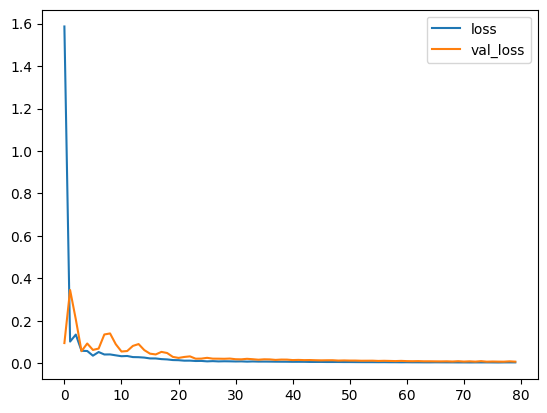

In [ ]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

1/1 [==============================] - 0s 29ms/step


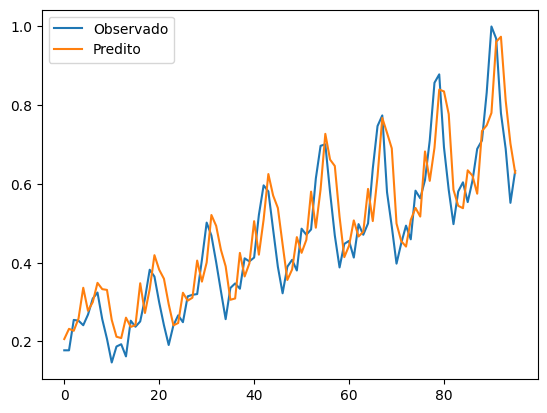

In [ ]:
validation_target = Y[-train_size:]
validation_predictions = []
i = -train_size
while len(validation_predictions) < len(validation_target):
  p = model.predict( X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

1/1 [==============================] - 0s 17ms/step


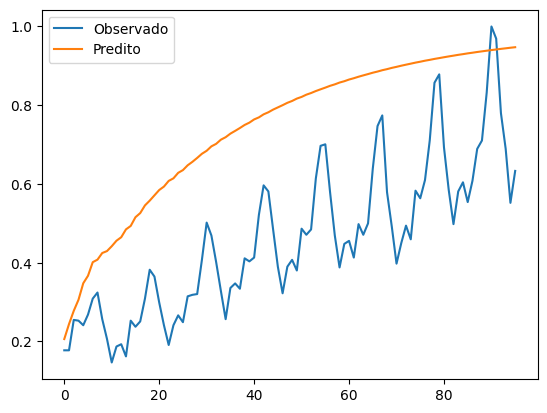

In [ ]:
validation_target = Y[-train_size:]
validation_predictions = []
last_x = X[-train_size]
while len(validation_predictions) < len(validation_target):
  p = model.predict( last_x.reshape(1, -1, 1))[0, 0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p
plt.plot(validation_target, label="Observado")
plt.plot(validation_predictions, label="Predito")
plt.legend()

<h1>8 - Seção 04 - RNN e Classificação de Textos - IMDB : Classificação de reviews
</h1>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb
tf.__version__

'2.12.0'

In [ ]:
num_words = 20000
maxlen = 200
# número de palavras
# máximo palavras no review
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train.shape
x_train
print(len(x_train[0]), len(x_train[1]))

218 189


In [ ]:
x_train = pad_sequences(x_train, maxlen=maxlen)
print(len(x_train[0]), len(x_train[1]))
x_test = pad_sequences(x_test, maxlen=maxlen)
print(len(x_test[0]), len(x_test[1]))

200 200
200 200


In [ ]:
# Construir a RNN
# recebe como entrada maxlen palavras
i = Input(shape=(x_train.shape[1], ))
# com textos precisa da camada de
# - representação numérica das palavras
# num_words palavras e 128 características para representar
#cada palavra (colunas)
# Não tem relação com a quantidade de unidades da LSTM
x = Embedding(input_dim=num_words, output_dim=128)(i)
x = LSTM(units=128, activation="tanh")(x)
x = Dense(units=1, activation="sigmoid")(x)
model = Model(i, x)

In [ ]:
# para RNN melhor rmsprop
model.compile(optimizer="rmsprop", loss="binary_crossentropy",
metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 128)          2560000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 10
r = model.fit(x_train, y_train, epochs=epochs, batch_size=128)

Epoch 1/10
196/196 [==============================] - 35s 131ms/step - loss: 0.5598 - accuracy: 0.6970
Epoch 2/10
196/196 [==============================] - 18s 91ms/step - loss: 0.3481 - accuracy: 0.8564
Epoch 3/10
196/196 [==============================] - 12s 61ms/step - loss: 0.2857 - accuracy: 0.8868
Epoch 4/10
196/196 [==============================] - 10s 49ms/step - loss: 0.2415 - accuracy: 0.9070
Epoch 5/10
196/196 [==============================] - 8s 41ms/step - loss: 0.2123 - accuracy: 0.9214
Epoch 6/10
196/196 [==============================] - 6s 33ms/step - loss: 0.1816 - accuracy: 0.9338
Epoch 7/10
196/196 [==============================] - 7s 35ms/step - loss: 0.1599 - accuracy: 0.9417
Epoch 8/10
196/196 [==============================] - 5s 27ms/step - loss: 0.1382 - accuracy: 0.9518
Epoch 9/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1211 - accuracy: 0.9568
Epoch 10/10
196/196 [==============================] - 4s 19ms/step - loss: 0.1042 - a

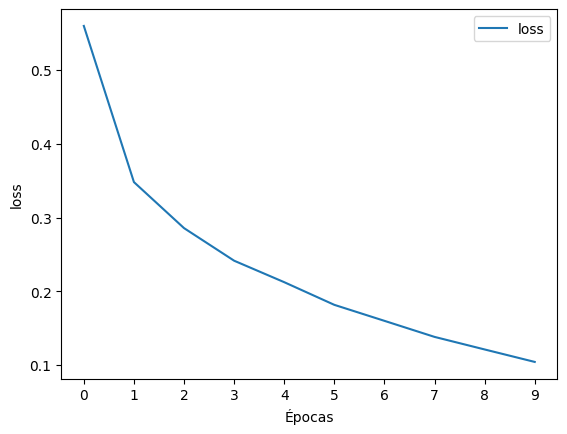

In [ ]:
plt.plot( r.history["loss"], label="loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

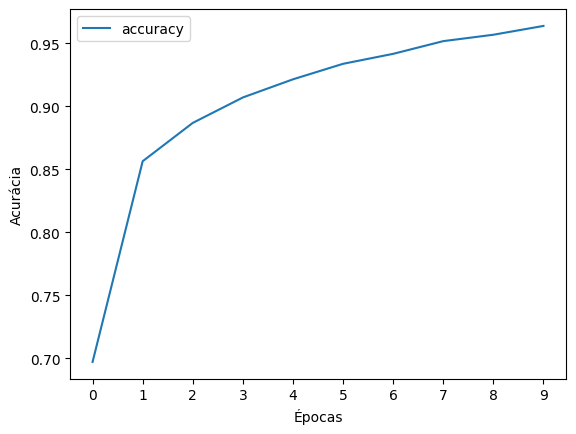

In [ ]:
plt.plot( r.history["accuracy"], label="accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(test_accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.4466 - accuracy: 0.8648
0.864799976348877


In [ ]:
texto = [[4, 107, 117, 5952, 15, 256, 4,2,7,3766]]

entrada = pad_sequences(texto, 200)
sent = np.round(model.predict(entrada)) 
print( "Positivo" if sent==1 else "Negativo" )

1/1 [==============================] - 1s 673ms/step
Negativo


<h1>9 - Seção 04 - RNN e Classificação de Textos - SPAM : Classificação de e-mails
</h1>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
!wget http://www.razer.net.br/datasets/spam.csv
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")
df.head()
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]
df["b_labels"] = df["labels"].map({ "ham": 0, "spam" : 1})
y = df["b_labels"].values

--2023-04-19 13:09:54--  http://www.razer.net.br/datasets/spam.csv
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  1.64MB/s    in 0.3s    

2023-04-19 13:09:55 (1.64 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df["data"],
y, test_size=0.33)

In [ ]:
# Número máximo de palavras para considerar
# São consideradas as mais frequentes, as demais são
#ignoradas
num_words = 20000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)
word2index = tokenizer.word_index
V = len(word2index)
print("%s tokens" % V)

7235 tokens


In [ ]:
data_train = pad_sequences(sequences_train)
T = data_train.shape[1] # tamanho da sequência
data_test = pad_sequences(sequences_test, maxlen=T)
print("data_train.shape: ", data_train.shape)
print("data_test.shape: ", data_test.shape)

data_train.shape:  (3733, 162)
data_test.shape:  (1839, 162)


In [ ]:
D = 20
M = 15
# tamanho do embedding, hiperparâmetro que pode ser escolhido
# tamanho do hidden state
i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
# x = LSTM(M)(x) # tirar o GlobalMaxPooling1D()
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(i, x)

In [ ]:
model.compile(
loss="binary_crossentropy",
optimizer="adam",
metrics=["accuracy"]
)
epochs = 20
r = model.fit(
data_train,
y_train,
epochs=epochs,
validation_data=(data_test, y_test))

Epoch 1/20
117/117 [==============================] - 16s 117ms/step - loss: 0.0336 - accuracy: 0.9946 - val_loss: 0.0919 - val_accuracy: 0.9728
Epoch 2/20
117/117 [==============================] - 6s 51ms/step - loss: 0.0268 - accuracy: 0.9949 - val_loss: 0.0628 - val_accuracy: 0.9804
Epoch 3/20
117/117 [==============================] - 4s 33ms/step - loss: 0.0214 - accuracy: 0.9962 - val_loss: 0.0662 - val_accuracy: 0.9804
Epoch 4/20
117/117 [==============================] - 3s 27ms/step - loss: 0.0182 - accuracy: 0.9971 - val_loss: 0.0661 - val_accuracy: 0.9804
Epoch 5/20
117/117 [==============================] - 3s 27ms/step - loss: 0.0170 - accuracy: 0.9965 - val_loss: 0.0682 - val_accuracy: 0.9788
Epoch 6/20
117/117 [==============================] - 2s 16ms/step - loss: 0.0134 - accuracy: 0.9981 - val_loss: 0.0676 - val_accuracy: 0.9799
Epoch 7/20
117/117 [==============================] - 2s 19ms/step - loss: 0.0119 - accuracy: 0.9984 - val_loss: 0.0687 - val_accuracy: 0.98

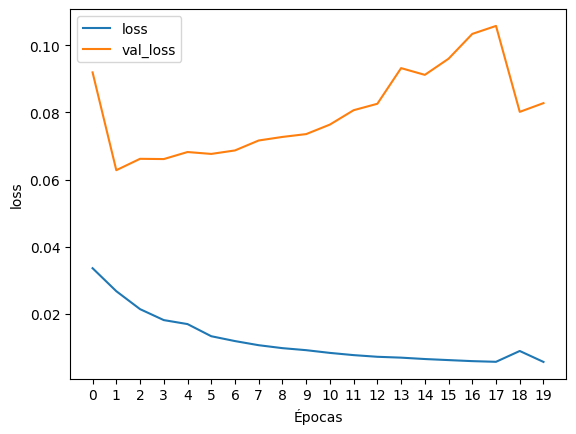

In [ ]:
plt.plot( r.history["loss"], label="loss")
plt.plot( r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("loss")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

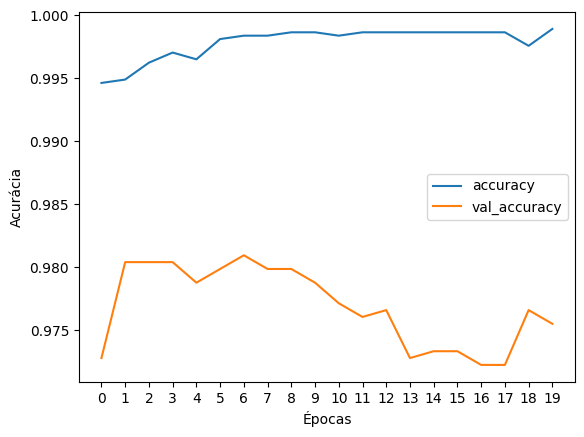

In [ ]:
plt.plot( r.history["accuracy"], label="accuracy")
plt.plot( r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks(np.arange(0, epochs, step=1))
plt.legend()

In [ ]:
texto = "You Have a Refund Coming, Verify Your Bank Account, You Have a New Billing Statement"
seq_texto = tokenizer.texts_to_sequences([texto])
data_texto = pad_sequences(seq_texto, maxlen=T)
pred= model.predict(data_texto)
print(pred)
print ("SPAM" if pred >= 0.5 else "OK")

1/1 [==============================] - 0s 338ms/step
[[0.06533947]]
OK


<h1>10 - Seção 04 - RNN e Classificação de Textos - Shakespeare: Geração de texto</h1>

In [1]:
import tensorflow as tf

import numpy as np
import os
import time


In [2]:
path_to_file = tf.keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')


1115394/1115394 [==============================] - 0s 0us/step


In [3]:
# Read, then decode for py2 compat.
text = open(path_to_file, 'rb').read().decode(encoding='utf-8')
# length of text is the number of characters in it
print(f'Length of text: {len(text)} characters')


Length of text: 1115394 characters


In [4]:
# Take a look at the first 250 characters in text
print(text[:250])


First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.



In [5]:
# The unique characters in the file
vocab = sorted(set(text))
print(f'{len(vocab)} unique characters')


65 unique characters


In [6]:
example_texts = ['abcdefg', 'xyz']

chars = tf.strings.unicode_split(example_texts, input_encoding='UTF-8')
chars


<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [7]:
ids_from_chars = tf.keras.layers.StringLookup(
    vocabulary=list(vocab), mask_token=None)


In [8]:
ids = ids_from_chars(chars)
ids


<tf.RaggedTensor [[40, 41, 42, 43, 44, 45, 46], [63, 64, 65]]>

In [9]:
chars_from_ids = tf.keras.layers.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True, mask_token=None)


In [10]:
chars = chars_from_ids(ids)
chars


<tf.RaggedTensor [[b'a', b'b', b'c', b'd', b'e', b'f', b'g'], [b'x', b'y', b'z']]>

In [11]:
tf.strings.reduce_join(chars, axis=-1).numpy()


array([b'abcdefg', b'xyz'], dtype=object)

In [12]:
def text_from_ids(ids):
  return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)


In [13]:
all_ids = ids_from_chars(tf.strings.unicode_split(text, 'UTF-8'))
all_ids


<tf.Tensor: shape=(1115394,), dtype=int64, numpy=array([19, 48, 57, ..., 46,  9,  1])>

In [14]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)


In [15]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))


F
i
r
s
t
 
C
i
t
i


In [16]:
seq_length = 100
examples_per_epoch = len(text)//(seq_length+1)


In [17]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
  print(chars_from_ids(seq))


tf.Tensor(
[b'F' b'i' b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':'
 b'\n' b'B' b'e' b'f' b'o' b'r' b'e' b' ' b'w' b'e' b' ' b'p' b'r' b'o'
 b'c' b'e' b'e' b'd' b' ' b'a' b'n' b'y' b' ' b'f' b'u' b'r' b't' b'h'
 b'e' b'r' b',' b' ' b'h' b'e' b'a' b'r' b' ' b'm' b'e' b' ' b's' b'p'
 b'e' b'a' b'k' b'.' b'\n' b'\n' b'A' b'l' b'l' b':' b'\n' b'S' b'p' b'e'
 b'a' b'k' b',' b' ' b's' b'p' b'e' b'a' b'k' b'.' b'\n' b'\n' b'F' b'i'
 b'r' b's' b't' b' ' b'C' b'i' b't' b'i' b'z' b'e' b'n' b':' b'\n' b'Y'
 b'o' b'u' b' '], shape=(101,), dtype=string)


In [18]:
for seq in sequences.take(5):
  print(text_from_ids(seq).numpy())


b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '
b'are all resolved rather to die than to famish?\n\nAll:\nResolved. resolved.\n\nFirst Citizen:\nFirst, you k'
b"now Caius Marcius is chief enemy to the people.\n\nAll:\nWe know't, we know't.\n\nFirst Citizen:\nLet us ki"
b"ll him, and we'll have corn at our own price.\nIs't a verdict?\n\nAll:\nNo more talking on't; let it be d"
b'one: away, away!\n\nSecond Citizen:\nOne word, good citizens.\n\nFirst Citizen:\nWe are accounted poor citi'


In [19]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text


In [20]:
split_input_target(list("Tensorflow"))


(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

In [21]:
dataset = sequences.map(split_input_target)


In [22]:
for input_example, target_example in dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy())
    print("Target:", text_from_ids(target_example).numpy())


Input : b'First Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou'
Target: b'irst Citizen:\nBefore we proceed any further, hear me speak.\n\nAll:\nSpeak, speak.\n\nFirst Citizen:\nYou '


In [23]:
# Batch size
BATCH_SIZE = 64

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset


<_PrefetchDataset element_spec=(TensorSpec(shape=(64, 100), dtype=tf.int64, name=None), TensorSpec(shape=(64, 100), dtype=tf.int64, name=None))>

In [24]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024


In [25]:
class MyModel(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, rnn_units):
    super().__init__(self)
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True,
                                   return_state=True)
    self.dense = tf.keras.layers.Dense(vocab_size)

  def call(self, inputs, states=None, return_state=False, training=False):
    x = inputs
    x = self.embedding(x, training=training)
    if states is None:
      states = self.gru.get_initial_state(x)
    x, states = self.gru(x, initial_state=states, training=training)
    x = self.dense(x, training=training)

    if return_state:
      return x, states
    else:
      return x


In [26]:
model = MyModel(
    # Be sure the vocabulary size matches the `StringLookup` layers.
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)


In [27]:
for input_example_batch, target_example_batch in dataset.take(1):
    example_batch_predictions = model(input_example_batch)
    print(example_batch_predictions.shape, "# (batch_size, sequence_length, vocab_size)")


(64, 100, 66) # (batch_size, sequence_length, vocab_size)


In [28]:
model.summary()


Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  16896     
                                                                 
 gru (GRU)                   multiple                  3938304   
                                                                 
 dense (Dense)               multiple                  67650     
                                                                 
Total params: 4,022,850
Trainable params: 4,022,850
Non-trainable params: 0
_________________________________________________________________


In [29]:
sampled_indices = tf.random.categorical(example_batch_predictions[0], num_samples=1)
sampled_indices = tf.squeeze(sampled_indices, axis=-1).numpy()


In [30]:
sampled_indices


array([32,  8, 49,  2, 23, 62, 28, 45, 11, 47,  0, 26, 32, 64, 65, 19, 18,
        4, 42, 24, 53,  6, 23, 54,  0, 43, 18, 40, 60,  0, 41, 49, 44, 59,
       22, 56, 44,  6, 61, 55, 28, 46, 56,  8, 48, 23, 35, 56, 15, 34, 29,
       11, 34, 40, 27,  9, 10, 28, 43,  7, 43, 31,  9, 57, 46, 43, 33, 61,
       36, 34, 34, 18, 64, 20, 65, 22, 61, 40, 40, 41, 33, 33, 34, 10, 10,
       56, 45, 47, 23, 16, 59, 37, 49, 12, 27, 21, 34, 59, 12, 19])

In [31]:
print("Input:\n", text_from_ids(input_example_batch[0]).numpy())
print()
print("Next Char Predictions:\n", text_from_ids(sampled_indices).numpy())


Input:
 b'me up, I trow;\nIs this the poultice for my aching bones?\nHenceforward do your messages yourself.\n\nJU'

Next Char Predictions:
 b"S-j JwOf:h[UNK]MSyzFE$cKn'Jo[UNK]dEau[UNK]bjetIqe'vpOgq-iJVqBUP:UaN.3Od,dR.rgdTvWUUEyGzIvaabTTU33qfhJCtXj;NHUt;F"


In [32]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)


In [33]:
example_batch_mean_loss = loss(target_example_batch, example_batch_predictions)
print("Prediction shape: ", example_batch_predictions.shape, " # (batch_size, sequence_length, vocab_size)")
print("Mean loss:        ", example_batch_mean_loss)


Prediction shape:  (64, 100, 66)  # (batch_size, sequence_length, vocab_size)
Mean loss:         tf.Tensor(4.190023, shape=(), dtype=float32)


In [34]:
tf.exp(example_batch_mean_loss).numpy()


66.02431

In [35]:
model.compile(optimizer='adam', loss=loss)


In [36]:
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)


In [37]:
EPOCHS = 5


In [38]:
history = model.fit(dataset, epochs=EPOCHS, callbacks=[checkpoint_callback])


Epoch 1/5
172/172 [==============================] - 15s 53ms/step - loss: 2.6996
Epoch 2/5
172/172 [==============================] - 10s 50ms/step - loss: 1.9724
Epoch 3/5
172/172 [==============================] - 11s 51ms/step - loss: 1.6959
Epoch 4/5
172/172 [==============================] - 10s 50ms/step - loss: 1.5379
Epoch 5/5
172/172 [==============================] - 10s 51ms/step - loss: 1.4409


In [39]:
class OneStep(tf.keras.Model):
  def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
    super().__init__()
    self.temperature = temperature
    self.model = model
    self.chars_from_ids = chars_from_ids
    self.ids_from_chars = ids_from_chars

    # Create a mask to prevent "[UNK]" from being generated.
    skip_ids = self.ids_from_chars(['[UNK]'])[:, None]
    sparse_mask = tf.SparseTensor(
        # Put a -inf at each bad index.
        values=[-float('inf')]*len(skip_ids),
        indices=skip_ids,
        # Match the shape to the vocabulary
        dense_shape=[len(ids_from_chars.get_vocabulary())])
    self.prediction_mask = tf.sparse.to_dense(sparse_mask)

  @tf.function
  def generate_one_step(self, inputs, states=None):
    # Convert strings to token IDs.
    input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
    input_ids = self.ids_from_chars(input_chars).to_tensor()

    # Run the model.
    # predicted_logits.shape is [batch, char, next_char_logits]
    predicted_logits, states = self.model(inputs=input_ids, states=states,
                                          return_state=True)
    # Only use the last prediction.
    predicted_logits = predicted_logits[:, -1, :]
    predicted_logits = predicted_logits/self.temperature
    # Apply the prediction mask: prevent "[UNK]" from being generated.
    predicted_logits = predicted_logits + self.prediction_mask

    # Sample the output logits to generate token IDs.
    predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
    predicted_ids = tf.squeeze(predicted_ids, axis=-1)

    # Convert from token ids to characters
    predicted_chars = self.chars_from_ids(predicted_ids)

    # Return the characters and model state.
    return predicted_chars, states


In [40]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)


In [41]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result[0].numpy().decode('utf-8'), '\n\n' + '_'*80)
print('\nRun time:', end - start)


ROMEO:
Fathering musicians?
I mean not sis;

HENRY BOLINGBROKE:
Have been live; a curse, my lord.

LUCENTIO:
Haithers, Who desend Out Jove jest, grow blood, I may
And thou love these angly, Warwick's feaces
The croans; and the crown sperit?
And like kind With a right as once that wof brows,
Or begin'd not the cure of usurply, and
yet clased in ploce-heavy? then more setser were in it
were daredity way danger? is it.

First Servant:
As, brother see, not to thy banom;
Bit fearar, more servocking pasted of me.

SurnLANUS:
Why, then, give me on him: were it, if this
Unwere dead To Warwick'd of morrow; and thou hast:
Or plain what, but jestorted Shall; shamonours heaven
Leasons, can faxe men galters fearful law!

QUEEN ELIZABETH:
Should put'st rest From secrocks; you can: 'I
IO ERWIRD IV:
And mighty parted green-dake gryenfulos majethen
As lawal tager cord for their down; my life councep time
The blood is with law inconsernath.

BISHOP:
Must I deserficed humb,
And much im tanning tern but y

In [42]:
start = time.time()
states = None
next_char = tf.constant(['ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:', 'ROMEO:'])
result = [next_char]

for n in range(1000):
  next_char, states = one_step_model.generate_one_step(next_char, states=states)
  result.append(next_char)

result = tf.strings.join(result)
end = time.time()
print(result, '\n\n' + '_'*80)
print('\nRun time:', end - start)


tf.Tensor(
[b"ROMEO:\nWithif threeten, since a begg and heaven laid me foin.\n\nPROSPERO:\nThround prince viteous us fow you know it me!\nFirst, As brother on the dent to doop agt\nMirecold, confection my lovembans hence fow your greaty,\nAt once that bloody dieg-colscided, jay father hate,\nYou have a trother Henry, Take not were swall\nAnd every crown'd poins on folded mements\nOf any so feal tome by obchood, may benneed.\n\nLUCENTIO:\nLet make me? Say not giets the enatch hate.\n\nBROTPOR:\nGod from the pole, shall see him so.\nThe betlemen's leave since not Rombard in man's bus, we mig of your accurnance of evenience\nTounder be within revoos full selfind, nay, but gree me\nTo his coundry's moved in all fair and goable;\nWho are not determed concounted matter lies,\nthough their duke may: you did my fearful to be Montupor;\nYou wound'd--moth untrunt to-day,\nWhence that wishem with them foul triblein?\nSo with reasoning here; our country's equal: fair was,\nBrought her foul, thou w

<h1> 11 - Seção 05 - Transfer Learning e Fine Tuning: Reconhecer gatos e cachorros</h1>

In [43]:
import os
import zipfile
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# plota os gráficos inline e salva no notebook
%matplotlib inline

In [44]:
!wget http://www.razer.net.br/datasets/cats_and_dogs_filtered.zip

--2023-04-25 14:37:04--  http://www.razer.net.br/datasets/cats_and_dogs_filtered.zip
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  38.1MB/s    in 1.7s    

2023-04-25 14:37:06 (38.1 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [45]:
# descompactar a base
dataset_path = "./cats_and_dogs_filtered.zip"
zip_object = zipfile.ZipFile(file=dataset_path, mode="r")
zip_object.extractall("./")
zip_object.close()

In [46]:
dataset_path_new = "./cats_and_dogs_filtered"
train_dir = os.path.join(dataset_path_new, "train")
test_dir = os.path.join(dataset_path_new, "validation")

In [47]:
input_shape = (128, 128, 3) # tamanho da imagem entrada
base_model = tf.keras.applications.MobileNetV2(
input_shape=input_shape,
include_top=False,
weights="imagenet")
base_model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReL

In [48]:
# Congelar modelo base
base_model.trainable = False

In [50]:
# Adicionar cabeçalho personalizado
print(base_model.output.shape)
# reduzir a dimensionalidade (4 x 4 x 1280 = 20480 pesos para treinar!!)
# Global Average Pooling
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
print(global_average_layer.shape)
prediction_layer = tf.keras.layers.Dense(units=1, activation="sigmoid")(
global_average_layer)

(None, 4, 4, 1280)
(None, 1280)


In [51]:
# Definição do modelo (unir o base com o personalizado)
model = tf.keras.models.Model(base_model.input,
prediction_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][0]']           

In [52]:
# compilar o modelo
# testar com o Adam também
model.compile(optimizer=tf.keras.optimizers.RMSprop(
learning_rate=0.0001),
loss="binary_crossentropy",
metrics = ["accuracy"])

In [53]:
# carga das imagens
# Pré-processamento /255
data_gen_train = ImageDataGenerator(rescale=1/255.)
data_gen_test = ImageDataGenerator(rescale=1/255.)
train_generator = data_gen_train.flow_from_directory(
train_dir,
target_size = (128,128),
batch_size = 128,
class_mode = "binary")
test_generator = data_gen_train.flow_from_directory(
test_dir,
target_size = (128,128),
batch_size = 128,
class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
# Treinar o modelo
EPOCHS = 5
r = model.fit(train_generator,
epochs
= EPOCHS,
validation_data = test_generator)

Epoch 1/5
16/16 [==============================] - 18s 675ms/step - loss: 0.9266 - accuracy: 0.4435 - val_loss: 0.8951 - val_accuracy: 0.4390
Epoch 2/5
16/16 [==============================] - 8s 506ms/step - loss: 0.7877 - accuracy: 0.5305 - val_loss: 0.7748 - val_accuracy: 0.5200
Epoch 3/5
16/16 [==============================] - 9s 564ms/step - loss: 0.6850 - accuracy: 0.6095 - val_loss: 0.6768 - val_accuracy: 0.6030
Epoch 4/5
16/16 [==============================] - 9s 561ms/step - loss: 0.5971 - accuracy: 0.6785 - val_loss: 0.5910 - val_accuracy: 0.6660
Epoch 5/5
16/16 [==============================] - 9s 551ms/step - loss: 0.5203 - accuracy: 0.7425 - val_loss: 0.5166 - val_accuracy: 0.7480


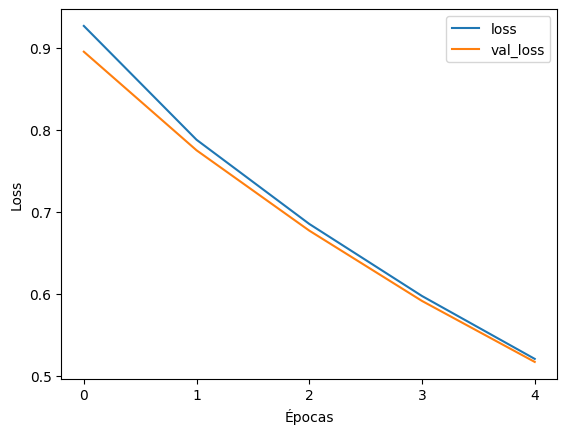

In [55]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

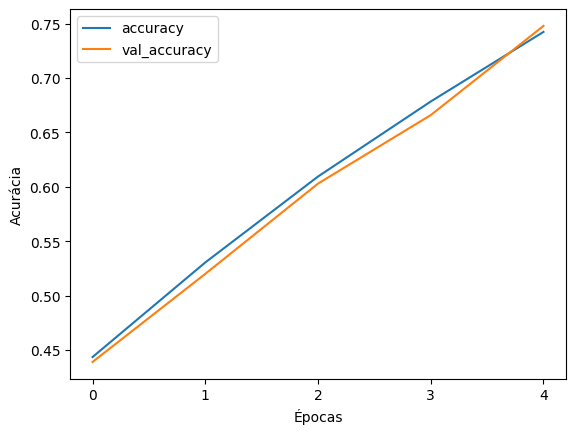

In [56]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

In [57]:
# Avaliação do Modelo
val_loss, val_accuracy = model.evaluate (test_generator)
print(val_accuracy)

8/8 [==============================] - 3s 339ms/step - loss: 0.5166 - accuracy: 0.7480
0.7480000257492065


In [59]:
# Efetuar o Fine Tuning
# Primeiro fazer o Transfer Learning
# Depois o Fine Tuning
# descongelar algumas camadas
base_model.trainable = True
len(base_model.layers)
# deixar o início da base
# congelar o final
fine_tuning_at = 100
for l in base_model.layers[:fine_tuning_at]:
  l.trainable = False

In [60]:
#compilar o modelo
# testar com o Adam tb
model.compile(optimizer = tf.keras.optimizers.RMSprop(
learning_rate=0.0001),
loss
= "binary_crossentropy",
metrics
= ["accuracy"])
# Treinar o modelo
EPOCHS = 5
r = model.fit(train_generator,
epochs = EPOCHS,
validation_data = test_generator)

Epoch 1/5
16/16 [==============================] - 23s 766ms/step - loss: 0.2005 - accuracy: 0.9135 - val_loss: 0.1466 - val_accuracy: 0.9430
Epoch 2/5
16/16 [==============================] - 11s 698ms/step - loss: 0.0290 - accuracy: 0.9990 - val_loss: 0.1189 - val_accuracy: 0.9570
Epoch 3/5
16/16 [==============================] - 8s 530ms/step - loss: 0.0141 - accuracy: 0.9995 - val_loss: 0.1561 - val_accuracy: 0.9540
Epoch 4/5
16/16 [==============================] - 9s 546ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.1634 - val_accuracy: 0.9550
Epoch 5/5
16/16 [==============================] - 9s 572ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1978 - val_accuracy: 0.9500


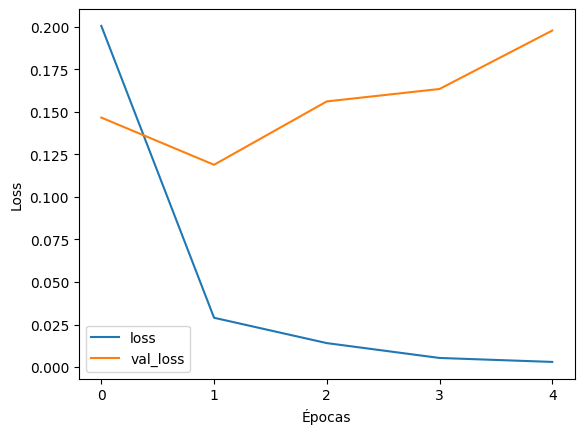

In [61]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.xlabel("Épocas")
plt.ylabel("Loss")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

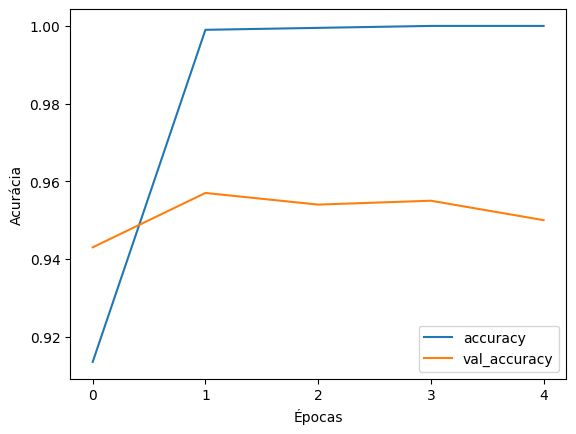

In [62]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.xticks( np.arange(0, EPOCHS, step=1) )
plt.legend()

In [63]:
# Avaliação do Modelo
val_loss, val_accuracy = model.evaluate(test_generator)
print(val_accuracy)

8/8 [==============================] - 4s 472ms/step - loss: 0.1978 - accuracy: 0.9500
0.949999988079071


<h1> 12 - Seção 06 - GAN : Gerador de dígitos fake</h1>

In [64]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [65]:
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-9md_w45y
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-9md_w45y
  Resolved https://github.com/tensorflow/docs to commit 3ad57a2dd8c8878c47e6e7e7cdfbe43d3c528d34
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=183273 sha256=0b0407f30c05323c8197aa08145cd642b8946739c64ae988738e0572722e06cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-g5akunu_/wheels/fc/f8/3b/5d21409a59cb1be9b1ade11f682039ced75b84de9dd6a0c8de
Successfully built tensorflow-docs


In [67]:
# Carga, pré-processamento e separação
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5 # Normalize the images to [-1, 1]
BUFFER_SIZE = 60000
BATCH_SIZE = 256
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

11490434/11490434 [==============================] - 0s 0us/step


In [68]:
def make_generator_model():
  model = tf.keras.Sequential()
  model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Reshape((7, 7, 256)))
  assert model.output_shape == (None, 7, 7, 256)
  # Note: None is the batch size
  model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
  assert model.output_shape == (None, 7, 7, 128)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
  assert model.output_shape == (None, 14, 14, 64)
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False,
  activation='tanh'))
  assert model.output_shape == (None, 28, 28, 1)
  return model
  

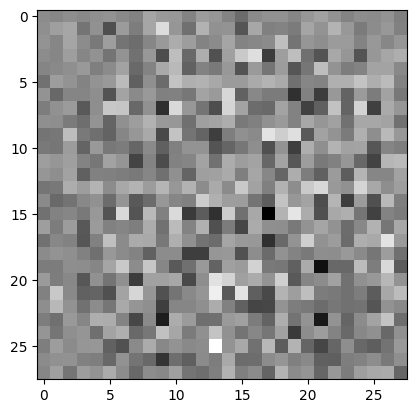

In [69]:
# teste de criação de uma imagem (sem treinar)
generator = make_generator_model()
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [70]:
def make_discriminator_model():
  model = tf.keras.Sequential()
  model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
  input_shape=[28, 28, 1]))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(0.3))
  model.add(layers.Flatten())
  model.add(layers.Dense(1))
  return model

In [71]:
# Teste do discriminador (não treinado)
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00324357]], shape=(1, 1), dtype=float32)


In [72]:
#Função de perda Binary Cross Entropy
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Quantifica quão bom é o discriminador
# Compara: predições de imagens reais com vetor de 1's
# Compara: predições de imagens fake com vetor de 0's
def discriminator_loss(real_output, fake_output):
  real_loss = cross_entropy(tf.ones_like(real_output), real_output)
  fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
  total_loss = real_loss + fake_loss
  return total_loss
# Quantifica quão bem o gerador enganou o discriminador
# Se for bom, imagens fake serão classificadas com 1's
# Compara: predições fake com 1's
def generator_loss(fake_output):
  return cross_entropy(tf.ones_like(fake_output), fake_output)
# Otimizador do gerador e discriminador
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [73]:
# Salvar pontos de verificação, caso a tarefa seja interrompida
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer, generator=generator, discriminator=discriminator)

In [74]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])
@tf.function
def train_step(images):
  noise = tf.random.normal([BATCH_SIZE, noise_dim])
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    generated_images = generator(noise, training=True)
    real_output = discriminator(images, training=True)
    fake_output = discriminator(generated_images, training=True)
    gen_loss = generator_loss(fake_output)
    disc_loss = discriminator_loss(real_output, fake_output)
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [76]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    for image_batch in dataset:
      train_step(image_batch)
    # Produz as imagens para o GIF
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch + 1, seed)
    # Salva a cada 15 épocas
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)
    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
    # Gera depois da época final
  display.clear_output(wait=True)
  generate_and_save_images(generator, epochs, seed)

In [77]:
# Gerar e salvar imagens
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)
  fig = plt.figure(figsize=(4, 4))
  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i+1)
    plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
    plt.axis('off')
    
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()  

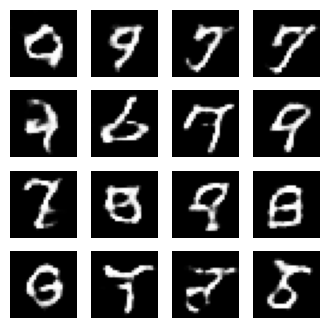

In [78]:
# Treinar o modelo
train(train_dataset, EPOCHS)
# restaurar o último ponto de verificação
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

<ipython-input-79-5a0b9fd685bb>:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-79-5a0b9fd685bb>:13: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)



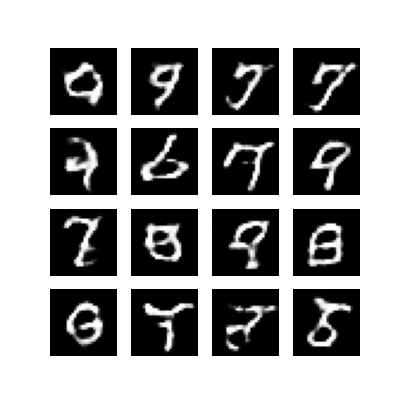

In [79]:
# Mostra uma imagem conforme a época
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))
display_image(EPOCHS)
# Gera e mostra o GIF
anim_file = 'dcgan.gif'
with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
  writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

<h1> 13 - Seção 07 - Sistema de Recomendação - Filmes : Sistema de recomendação</h1>

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, Flatten, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.utils import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
!wget -nc http://www.razer.net.br/datasets/ml-20m.zip
!unzip -n ml-20m.zip
df = pd.read_csv("ml-20m/ratings.csv")
df.head()

--2023-04-25 15:37:48--  http://www.razer.net.br/datasets/ml-20m.zip
Resolving www.razer.net.br (www.razer.net.br)... 178.128.150.229
Connecting to www.razer.net.br (www.razer.net.br)|178.128.150.229|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198702078 (189M) [application/zip]
Saving to: ‘ml-20m.zip’

ml-20m.zip          100%[===================>] 189.50M  47.8MB/s    in 4.4s    

2023-04-25 15:37:53 (43.1 MB/s) - ‘ml-20m.zip’ saved [198702078/198702078]

Archive:  ml-20m.zip
   creating: ml-20m/
  inflating: ml-20m/genome-scores.csv  
  inflating: ml-20m/genome-tags.csv  
  inflating: ml-20m/links.csv        
  inflating: ml-20m/movies.csv       
  inflating: ml-20m/ratings.csv      
  inflating: ml-20m/README.txt       
  inflating: ml-20m/tags.csv         


,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [83]:
# userId e movieId não estão no formato certo para usar
# Embeddings, devem ser categóricos
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes

In [84]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [85]:
N = len(set(user_ids))
M = len(set(movie_ids))
# dimensão do embedding (tentar outros)
K = 10

In [86]:
# usuário
u = Input(shape=(1,))
u_emb = Embedding(N, K)(u) # saída : num_samples, 1, K
u_emb = Flatten()(u_emb)
# saída : num_samples, K
# filme
m = Input(shape=(1,))
m_emb = Embedding(M, K)(m)
m_emb = Flatten()(m_emb)
# saída : num_samples, 1, K
# saída : num_samples, K
x = Concatenate()([u_emb, m_emb])
x = Dense(1024, activation="relu")(x)
x = Dense(1)(x)
model = Model(inputs=[u, m], outputs=x)

In [87]:
model.compile(
loss="mse",
optimizer=SGD(learning_rate=0.08, momentum=0.9)
)

In [88]:
user_ids, movie_ids, ratings = shuffle(user_ids, movie_ids, ratings)
Ntrain = int(0.8 * len(ratings)) # separar os dados 80% x 20%
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]
test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]
# centralizar as notas
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [89]:
epochs = 25
r = model.fit(
x=[train_user, train_movie],
y=train_ratings,
epochs=epochs,
batch_size=1024,
verbose=2, # não imprime o progresso
validation_data=([test_user, test_movie], test_ratings)
)

Epoch 1/25
15626/15626 - 84s - loss: 0.7656 - val_loss: 0.7155 - 84s/epoch - 5ms/step
Epoch 2/25
15626/15626 - 66s - loss: 0.6987 - val_loss: 0.6971 - 66s/epoch - 4ms/step
Epoch 3/25
15626/15626 - 64s - loss: 0.6759 - val_loss: 0.6798 - 64s/epoch - 4ms/step
Epoch 4/25
15626/15626 - 64s - loss: 0.6622 - val_loss: 0.6735 - 64s/epoch - 4ms/step
Epoch 5/25
15626/15626 - 64s - loss: 0.6520 - val_loss: 0.6761 - 64s/epoch - 4ms/step
Epoch 6/25
15626/15626 - 64s - loss: 0.6357 - val_loss: 0.6520 - 64s/epoch - 4ms/step
Epoch 7/25
15626/15626 - 61s - loss: 0.6188 - val_loss: 0.6443 - 61s/epoch - 4ms/step
Epoch 8/25
15626/15626 - 62s - loss: 0.6081 - val_loss: 0.6421 - 62s/epoch - 4ms/step
Epoch 9/25
15626/15626 - 65s - loss: 0.5996 - val_loss: 0.6409 - 65s/epoch - 4ms/step
Epoch 10/25
15626/15626 - 62s - loss: 0.5918 - val_loss: 0.6361 - 62s/epoch - 4ms/step
Epoch 11/25
15626/15626 - 61s - loss: 0.5844 - val_loss: 0.6337 - 61s/epoch - 4ms/step
Epoch 12/25
15626/15626 - 63s - loss: 0.5768 - val_l

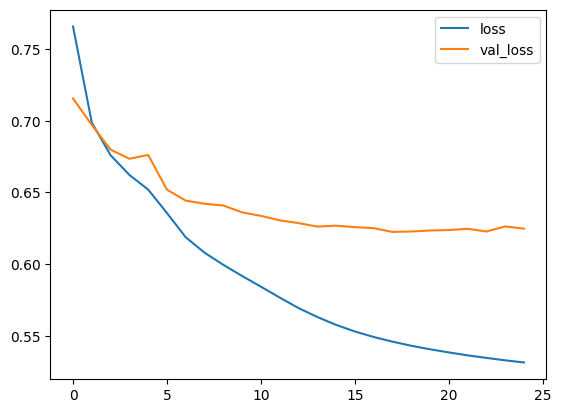

In [90]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

In [91]:
# Recomendações para o usuário 73023
# Gerar o array com o usuário único
# repete a quantidade de filmes
input_usuario = np.repeat(a=73023, repeats=M)
film = np.array(list(set(movie_ids)))
preds = model.predict( [input_usuario, film] )
# descentraliza as predições
rat = preds.flatten() + avg_rating
# índice da maior nota
idx = np.argmax(rat)
print("Recomendação: Filme - ", film[idx], " / ", rat[idx] , "*")

836/836 [==============================] - 1s 2ms/step
Recomendação: Filme -  843  /  4.218995 *
